# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/7

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [3]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.1 MB/s eta 0:00:00


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


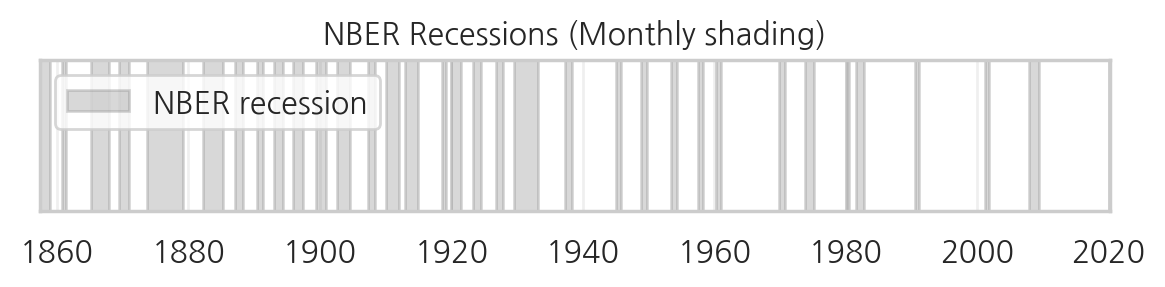

In [4]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

In [11]:
# import packages
from datetime import date

import statsmodels.api as sm # module for stats models
from statsmodels.iolib.summary2 import summary_col # module for presenting stats models outputs nicely

import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets


## 베타의 크기와 소비평탄화

In [12]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y1 = 0*np.sin(x)
y2 = 0.5*np.sin(x)
y3 = np.sin(x)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/beta_businesscycle.png


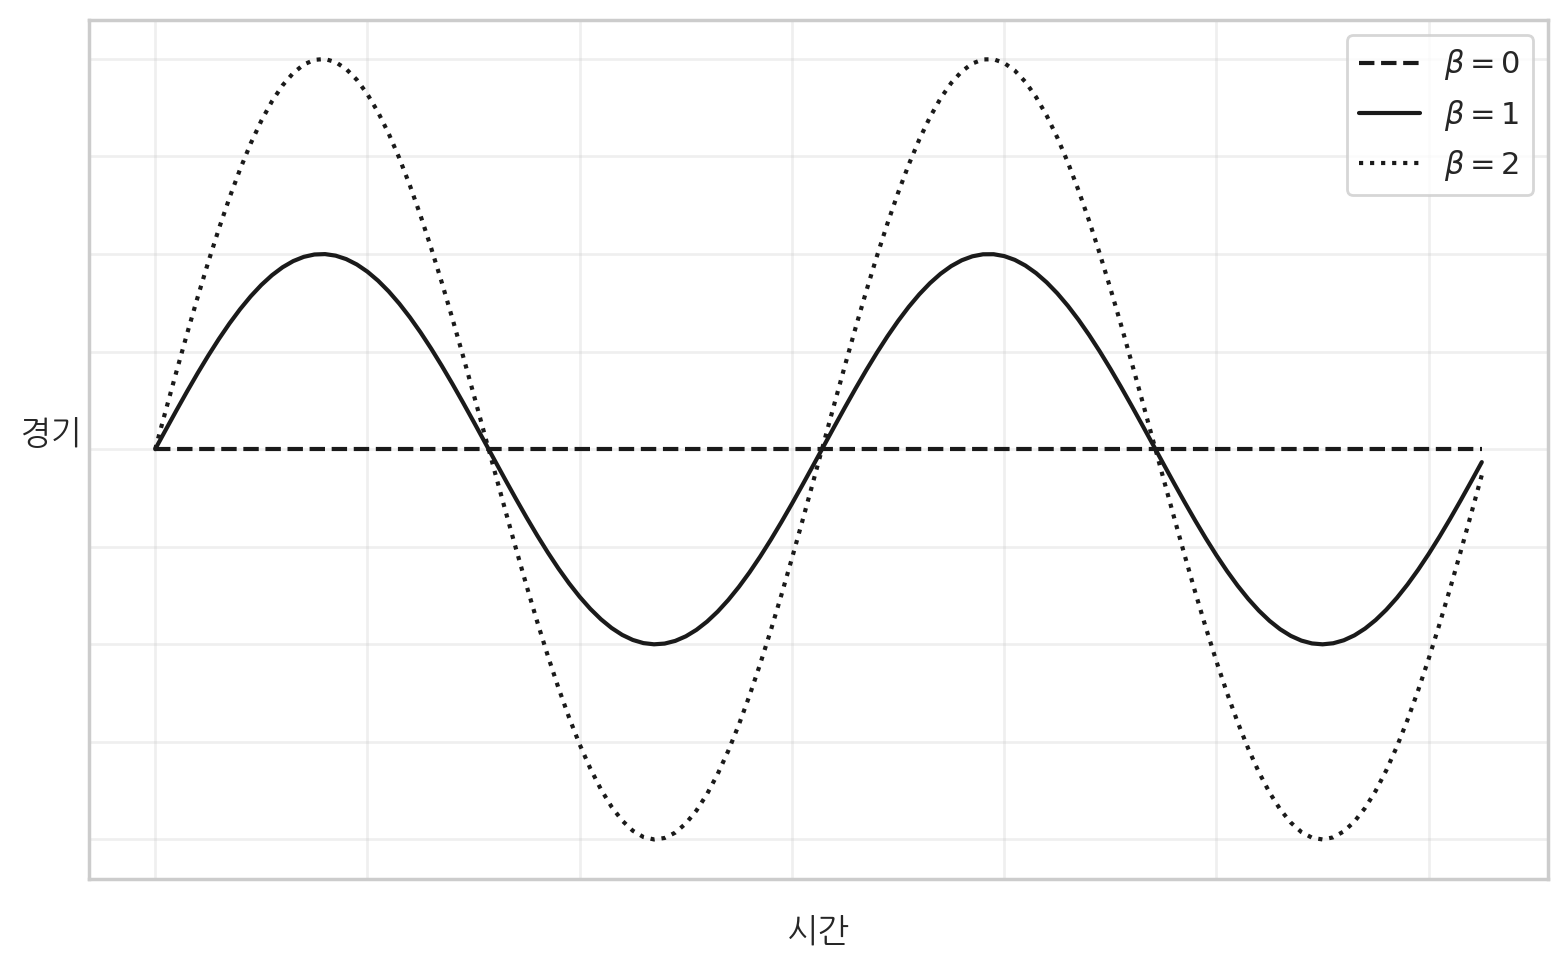

In [13]:
plt.plot(x,y1,label=r'$\beta=0$',linestyle='dashed',color='k')
plt.plot(x,y2,label=r'$\beta=1$',linestyle='solid',color='k')
plt.plot(x,y3,label=r'$\beta=2$',linestyle='dotted',color='k')

plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

plt.xlabel('시간')
plt.ylabel('경기', rotation=0)

plt.legend()

save_fig('beta_businesscycle')

plt.show()

## 베타와 수익률의 관계

- 미국 주식시장 1926-1991년 기간 S&P500, 소규모 기업, 장기국채, 단기국채의 평균 수익률, 변동성, 베타
- 출처: Jagannathan and McGrattan (1995)

|            | S&P500 | 소규모기업 |  장기국채  |  단기국채  |
|------------|:------:|:-----:|:----:|:----:|
| 평균 수익률     |  11.94 | 16.05 | 4.94 | 3.64 |
| 변동성 |  20.22 | 31.02 | 7.62 | 0.94 |
| 베타       |  1.03  |  1.39 | 0.07 | 0.00 |

In [14]:
# 위의 표를 DataFrame으로 만들기
df = {'returns':[11.94, 16.05, 4.94, 3.65],
      'vol':[20.22, 31.02, 7.62, 0.94],
      'beta':[1.03, 1.49, 0.07, 0.00]}
df = pd.DataFrame(df, index=['S&P500','소규모','장기국채','단기국채'])
print(df)

        returns    vol  beta
S&P500   11.940 20.220 1.030
소규모      16.050 31.020 1.490
장기국채      4.940  7.620 0.070
단기국채      3.650  0.940 0.000


In [15]:
# Regress returns on beta
y = df['returns']
x = df['beta']
x_cons = sm.add_constant(x)

model = sm.OLS(y,x_cons).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     558.4
Date:                Sat, 07 Feb 2026   Prob (F-statistic):            0.00179
Time:                        22:51:11   Log-Likelihood:               -0.90869
No. Observations:                   4   AIC:                             5.817
Df Residuals:                       2   BIC:                             4.590
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9642      0.307     12.918      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/CAPM_4obs.png


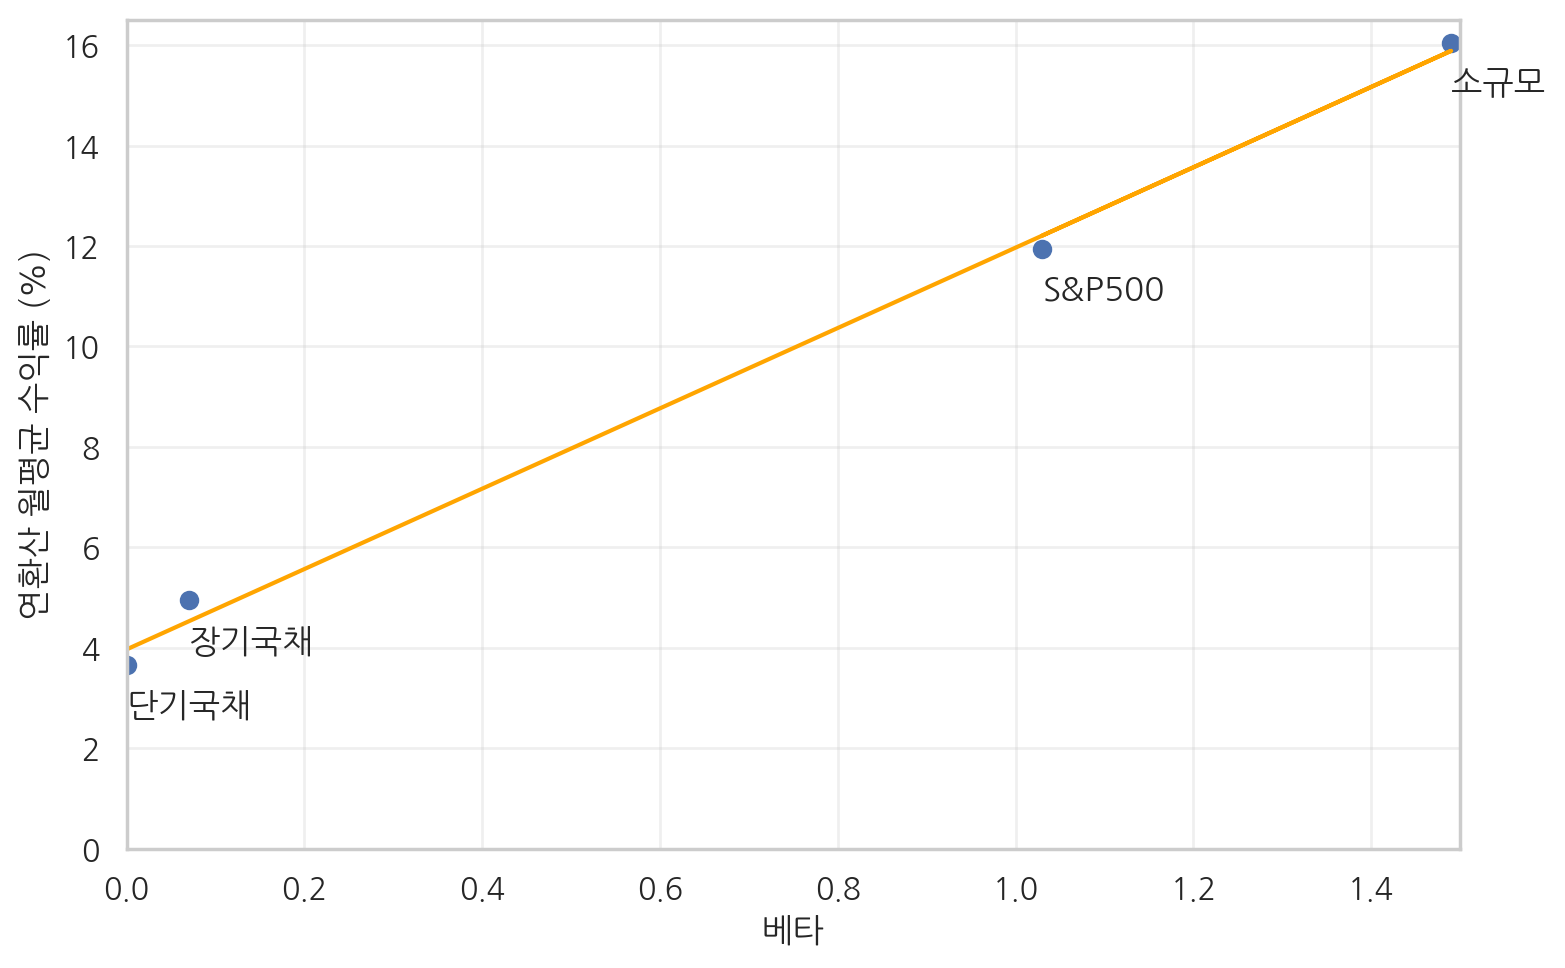

In [16]:
# 산포도와 fitted line

plt.scatter(x,y)
plt.plot(x,model.predict(x_cons), color='orange')

for i, row in df.iterrows():
    plt.annotate(i, (row['beta'], row['returns']-1))

plt.xlabel('베타')
plt.ylabel('연환산 월평균 수익률 (%)')

plt.xlim([0.0,1.5])
plt.ylim([0,16.5])

save_fig('CAPM_4obs')

plt.show()

## Ken French 웹사이트에서 데이터 불러오기

### 이용가능한 데이터 리스트

In [17]:
# 이용가능한 데이터 갯수
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))

No. of datasets:297


In [18]:
datasets[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [19]:
datasets[-5:]

['Emerging_Markets_6_Portfolios_ME_INV',
 'Emerging_Markets_6_Portfolios_ME_Prior_12_2',
 'Emerging_Markets_4_Portfolios_BE-ME_OP',
 'Emerging_Markets_4_Portfolios_OP_INV',
 'Emerging_Markets_4_Portfolios_BE-ME_INV']

## "Too Flat SML"

In [20]:
# 'BETA'란 용어가 들어간 데이터 찾기
print([dataset for dataset in datasets if 'BETA' in dataset])

['Portfolios_Formed_on_BETA', '25_Portfolios_ME_BETA_5x5']


In [21]:
date_start = '1963-07'
#date_end = '2006-12'
date_end = '2023-12'

# Fama-French 3 요인 (마켓, SMB, HML) 데이터
FF3 = web.DataReader('F-F_Research_Data_Factors','famafrench',start=date_start,end=date_end)[0]

# 베타로 sorting된 포트폴리오
pf_beta = web.DataReader('Portfolios_Formed_on_BETA', 'famafrench',start=date_start,end=date_end)[0]

In [22]:
FF3.head(2)

,Mkt-RF,SMB,HML,RF
Date,,,,
1963-07,-0.390,-0.570,-0.810,0.270
1963-08,5.080,-0.950,1.700,0.250


In [24]:
pf_beta = pf_beta.iloc[:,5:]
pf_beta.head(2)

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1963-07,1.340,0.760,-0.240,0.630,-1.370,-1.220,-0.420,-1.400,-1.940,1.050
1963-08,3.550,3.890,4.700,5.110,4.780,7.300,7.930,4.880,9.240,10.970


In [25]:
# get market return
FF3['r_m'] = FF3['Mkt-RF'] + FF3['RF']

# get average returns of 10 pfs sorted on beta
pf_mean = pf_beta.mean()*12
print(pf_mean)

Lo 10   10.898
Dec 2   10.539
Dec 3   11.659
Dec 4   12.516
Dec 5   11.971
Dec 6   12.075
Dec 7   11.944
Dec 8   13.455
Dec 9   13.477
Hi 10   12.648
dtype: float64


In [26]:
betas = []
var_rM = FF3['r_m'].var()

for col in pf_beta.columns:
  covar = np.cov(pf_beta[col],FF3['r_m'])[0,1]
  beta_estimate = covar/var_rM
  betas.append(beta_estimate)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/tooflatSML.png


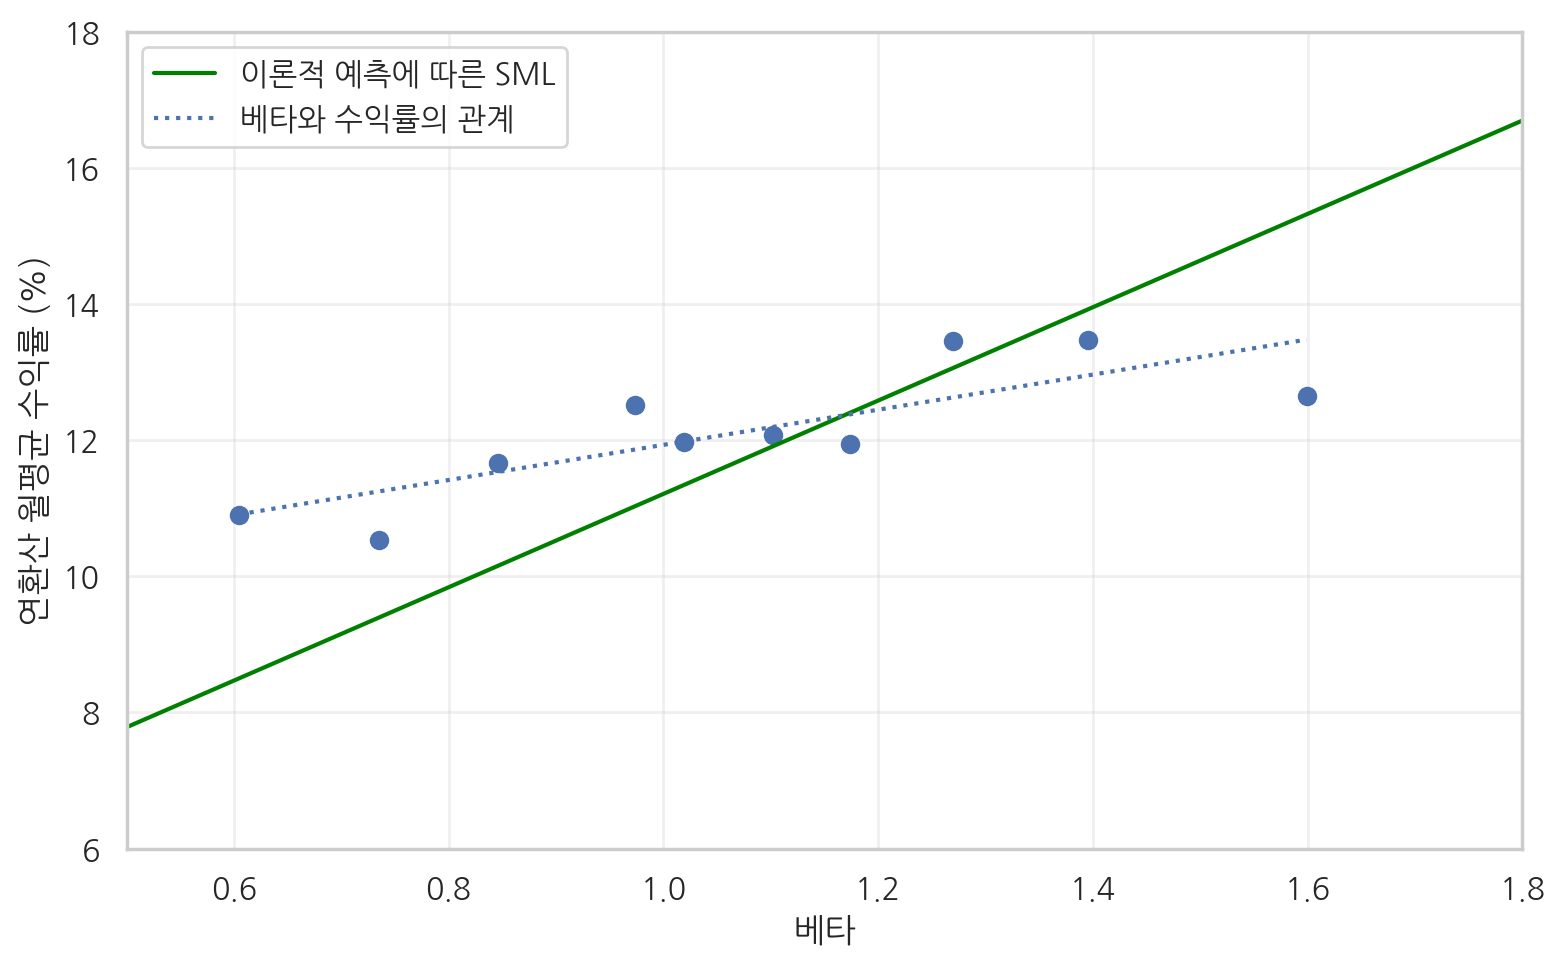

In [27]:
# for SML
x = np.arange(0,1.9,0.01)
y = FF3['RF'].mean()*12 + x*(FF3['Mkt-RF'].mean()*12)
plt.plot(x,y,color='green',label='이론적 예측에 따른 SML')

plt.scatter(betas, pf_mean)

betas_cons = sm.add_constant(betas)
model = sm.OLS(pf_mean,betas_cons).fit()
plt.plot(betas,model.predict(betas_cons), linestyle=":", label="베타와 수익률의 관계" )

plt.xlabel('베타')
plt.ylabel('연환산 월평균 수익률 (%)')
plt.legend()

plt.xlim([0.5,1.8])
plt.ylim([6,18])

save_fig('tooflatSML')

## 부록
### Fama-French method

In [29]:
!pip -q install linearmodels

In [30]:
from linearmodels.datasets import french

data = french.load()
print(french.DESCR)


Data from Ken French's data library
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

dates    Year and Month of Return
MktRF    Market Factor
SMB      Size Factor
HML      Value Factor
Mom      Momentum Factor
RF       Risk-free rate
NoDur    Industry: Non-durables
Durbl    Industry: Durables
Manuf    Industry: Manufacturing
Enrgy    Industry: Energy
Chems    Industry: Chemicals
BusEq    Industry: Business Equipment
Telcm    Industry: Telecoms
Utils    Industry: Utilities
Shops    Industry: Retail
Hlth     Industry: Health care
Money    Industry: Finance
Other    Industry: Other
S1V1     Small firms, low value
S1V3     Small firms, medium value
S1V5     Small firms, high value
S3V1     Size 3, value 1
S3V3     Size 3, value 3
S3V5     Size 3, value 5
S5V1     Large firms, Low value
S5V3     Large firms, medium value
S5V5     Large Firms, High value
S1M1     Small firms, losers
S1M3     Small firms, neutral
S1M5     Small firms, winners
S3M1     Size 3, momentu

In [31]:
factors = data[['MktRF', 'SMB', 'HML']]
portfolios = data[['S1V1','S1V3','S1V5','S5V1','S5V3','S5V5']].copy()
portfolios.loc[:,:] = portfolios.values - data[['RF']].values
from linearmodels.asset_pricing import LinearFactorModel
mod = LinearFactorModel(portfolios, factors)
res = mod.fit(cov_type='kernel')
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  6   R-squared:                      0.8879
No. Factors:                          3   J-statistic:                    39.109
No. Observations:                   819   P-value                         0.0000
Date:                  Sat, Feb 07 2026   Distribution:                  chi2(3)
Time:                          22:55:40                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0060     0.0016     3.7381     0.0002      0.0029      0.0092
SMB            0.0001     0.0011    

In [32]:
mod = LinearFactorModel(portfolios, factors['MktRF'])
res = mod.fit(cov_type='kernel')
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  6   R-squared:                      0.6604
No. Factors:                          1   J-statistic:                    49.565
No. Observations:                   819   P-value                         0.0000
Date:                  Sat, Feb 07 2026   Distribution:                  chi2(5)
Time:                          22:55:47                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0067     0.0018     3.7678     0.0002      0.0032      0.0102

Covariance estimator:
KernelCovaria

In [33]:
# 1-stage time-series regression

factors = factors[['MktRF']]
pfs = portfolios

X = sm.add_constant(factors)
X.shape

ts_model = sm.OLS(pfs, X).fit()
alphas = ts_model.params[0]
betas = ts_model.params[1:]

betas

,0,1,2,3,4,5
MktRF,1.380,1.077,1.060,0.992,0.853,0.991


In [34]:
betas1 = sm.add_constant(betas.T)

cs_model1 = sm.OLS(pfs.T.values, betas1.values).fit()
gammas = cs_model1.params.T

avg_gamma = np.mean(gammas,0)
avg_gamma

array([ 0.016, -0.008])

In [36]:
# -----------------------------
# 2nd-step cross-sectional regression (Fama–MacBeth)
# -----------------------------

# 예: T기간 동안 K개의 위험가격 추정치
gammas = cs_model1.params.T

# 기간 수 T (자동 계산)
T = gammas.shape[0]

# 평균 위험가격
avg_gamma = np.mean(gammas, axis=0)

# 표준오차 (FM: time-series std / sqrt(T))
stds = np.std(gammas, axis=0, ddof=1) / np.sqrt(T)

# t-values
tvals = avg_gamma / stds

# 출력
print("Averages of gammas:")
print(avg_gamma)

print("\nStandard errors:")
print(stds)

print("\nt-values:")
print(tvals)

Averages of gammas:
[ 0.016 -0.008]

Standard errors:
[0.004 0.004]

t-values:
[ 3.871 -1.723]
